In [1]:
import qsdsan as qs, exposan
print(f'This tutorial was made with qsdsan v{qs.__version__} and exposan v{exposan.__version__}')

This tutorial was made with qsdsan v1.2.5 and exposan v1.2.5


In [2]:
# Let's load the BSM1 system first
from exposan import bsm1
bsm1.load()
sys = bsm1.sys
sys.show()

System: bsm1_sys
ins...
[0] wastewater
    phase: 'l', T: 293.15 K, P: 101325 Pa
    flow (kmol/hr): S_I   23.1
                    S_S   53.4
                    X_I   39.4
                    X_S   155
                    X_BH  21.7
                    S_NH  1.34
                    S_ND  0.381
                    ...   4.26e+04
outs...
[0] effluent
    phase: 'l', T: 293.15 K, P: 101325 Pa
    flow: 0
[1] WAS
    phase: 'l', T: 293.15 K, P: 101325 Pa
    flow: 0


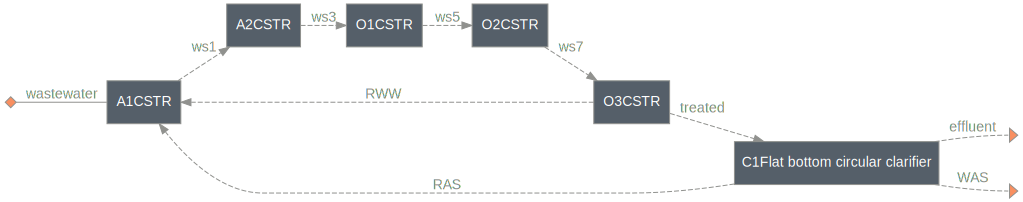

In [3]:
# The BSM1 system is composed of 5 CSTRs in series,
# followed by a flat-bottom circular clarifier.
sys.diagram()
# sys.units

In [4]:
# We can verify that by
sys.isdynamic

True

In [5]:
# This is because the system contains at least one dynamic SanUnit
{u: u.isdynamic for u in sys.units}

# If we disable dynamic simulation, then `simulate` would work as usual
# sys.isdynamic = False
# sys.simulate()

{<CSTR: A1>: True,
 <CSTR: A2>: True,
 <CSTR: O1>: True,
 <CSTR: O2>: True,
 <CSTR: O3>: True,
 <FlatBottomCircularClarifier: C1>: True}

In [ ]:
# Let's try simulating the BSM1 system from day 0 to day 50
sys.simulate(t_span=(0, 50), method='BDF', state_reset_hook='reset_cache')
sys.show()

C:\Users\joy_c\anaconda3\envs\tut\lib\site-packages\qsdsan\sanunits\_suspended_growth_bioreactor.py:44: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 2d, A))
  flow_in = Q_ins @ C_ins / V_arr
C:\Users\joy_c\anaconda3\envs\tut\lib\site-packages\numba\core\typing\npydecl.py:913: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 2d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


In [ ]:
# This shows the units/streams whose state variables are kept track of
# during dynamic simulations.
sys.scope.subjects